# Behavioural Data

This notebook analyses the behavioural data for the EEG task, within and between groups.

The task is a working memory task. Subjects have to respond to coloured squares and indicate, after a delay, whether any items have changed colour. 

Load refers to the number of items on the screen, as {1, 2, 3}. 

For more details on the task, see:

    Voytek & Knight (2010) Prefrontal cortex and basal ganglia contributions to visual working memory

### Notes

Behavioural performance has been pre-computed and analyzed in terms of d-prime (`d'`). 

There is a separate `d'` value, per subject, per load.
- `all_behav_vals` is the `d'` for each load, for each participant
- `avg_behav_vals` is the average `d'` across loads, for each participant 

In [1]:
%matplotlib inline

from os.path import join as pjoin

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [2]:
# Import custom code for this analysis
import sys
sys.path.append('../code')

from plts import *
from utils import *
from settings import RESULTS_PATH

## Behavioural Data Analysis

In [3]:
# Load behavioural Data
behav_file = pjoin(RESULTS_PATH, 'Behav', 'neural_aging_data_behaviour.csv')
behav_data = pd.read_csv(behav_file)

In [4]:
# Note: outlier subject, SubjID: 8
#   There is a subject in the OLD group with 'outlier' level good performance
#behav_data[behav_data["SubjID"] == 8]

In [5]:
# Sanity check behavioural data
behav_data.head()

,SubjID,Age,Load,CDA,d'
0,1,1,1,-0.442318,4.701454
1,2,1,1,-0.326298,3.934543
2,3,1,1,-1.291108,3.040111
3,4,1,1,-1.692917,4.733815
4,5,1,1,-0.173045,4.380097


In [6]:
# Collapse behavioural data across loads
avg_behav = behav_data.groupby('SubjID').mean()

In [7]:
# Check average d', split up by age groups
avg_behav.groupby('Age')["d'"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
1,17.0,3.723283,0.781225,2.429116,2.907601,4.016855,4.217998,4.899760
2,14.0,3.105764,0.886168,1.390209,2.670936,3.090130,3.692970,4.751966


In [8]:
# Check average CDA, split up by age groups
avg_behav.groupby('Age')["CDA"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
1,17.0,-1.395421,1.145267,-4.305039,-2.073300,-0.952601,-0.711283,0.575874
2,14.0,-1.110141,0.467909,-1.850606,-1.414441,-1.246122,-0.751901,-0.415433


In [9]:
# Check correlations between d' and CDA measure
print_stat('ALL: \t', *pearsonr(avg_behav["CDA"], avg_behav["d'"]))
print_stat('YNG: \t', *pearsonr(avg_behav[avg_behav['Age'] == 1]["CDA"],
                                avg_behav[avg_behav['Age'] == 1]["d'"]))
print_stat('OLD: \t', *pearsonr(avg_behav[avg_behav['Age'] == 2]["CDA"],
                                avg_behav[avg_behav['Age'] == 2]["d'"]))

ALL: 	: 	  0.0104 	 0.9555
YNG: 	: 	  0.2805 	 0.2755
OLD: 	: 	 -0.4481 	 0.1081


In [10]:
# Create behaviour plot
avg_behav_vals = np.concatenate([avg_behav[avg_behav['Age'] == 2]["d'"].values,
                                 avg_behav[avg_behav['Age'] == 1]["d'"].values])
all_behav_vals = np.concatenate([behav_data[behav_data['Age'] == 2]["d'"].values,
                                 behav_data[behav_data['Age'] == 1]["d'"].values])

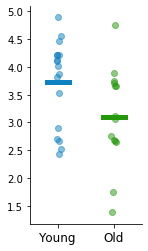

In [11]:
# Plot the comparison of the averaged (across loads) d', split up by group
plot_comp_scatter(avg_behav_vals)

In [12]:
# Statistically compare the difference in avg behaviour between yng & old
ttest_ind(avg_behav_vals[YNG_INDS], avg_behav_vals[OLD_INDS])

Ttest_indResult(statistic=2.061705493268976, pvalue=0.04829911348520237)

Conclusion: there is a main effect of a difference of behaviour between group. 

### Check behavioural difference split up by load

In [13]:
def get_load(behav_data, load):
    """Helper function to get behav from a specific load."""
    
    temp = behav_data[behav_data["Load"] == load]
    load_vals = np.concatenate([temp[temp['Age'] == 2]["d'"].values,
                                temp[temp['Age'] == 1]["d'"].values])
    
    return load_vals

In [14]:
# Collect and print comparison across loads data
loads_data = []
for load in [1, 2, 3]:
    
    load_vals = get_load(behav_data, load)
    
    cur_data = {}
    cur_data['load'] = load
    print('LOAD:', str(load))
    
    cur_data['yng_mean'] = np.mean(load_vals[YNG_INDS])
    cur_data['old_mean'] = np.mean(load_vals[OLD_INDS])
    print('\tMean YNG: {:1.2f}'.format(cur_data['yng_mean']))
    print('\tMean OLD: {:1.2f}'.format(cur_data['old_mean']))
    
    cur_data['yng_std'] = np.std(load_vals[YNG_INDS])
    cur_data['old_std'] = np.std(load_vals[OLD_INDS])
        
    cur_data['dif'] = np.mean(load_vals[YNG_INDS] - np.mean(load_vals[OLD_INDS]))
    print('\tDiff\t', cur_data['dif'])

    cur_data['ttest'] = ttest_ind(load_vals[YNG_INDS], load_vals[OLD_INDS])
    print('\tT-Test\t {:1.4f} {:1.4f}'.format(*cur_data['ttest']))
    
    loads_data.append(cur_data)

LOAD: 1
	Mean YNG: 3.96
	Mean OLD: 3.62
	Diff	 0.34713751982773156
	T-Test	 1.1341 0.2660
LOAD: 2
	Mean YNG: 3.84
	Mean OLD: 3.24
	Diff	 0.5985745321134457
	T-Test	 1.9911 0.0560
LOAD: 3
	Mean YNG: 3.37
	Mean OLD: 2.47
	Diff	 0.906845622542017
	T-Test	 2.5969 0.0146


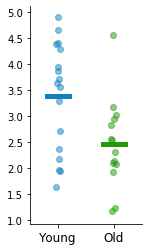

In [15]:
# Plot the comparison for specific load
load_ind = 3
load_vals = get_load(behav_data, load_ind)
plot_comp_scatter(load_vals)

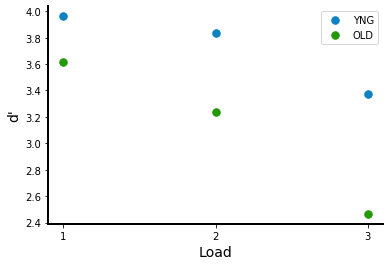

In [16]:
# Plot the average behaviour, per age group, across loads
plot_behav_loads(loads_data)

#### Why such a difference across loads?

Here, we examine the change in behaviour within subjects, between loads.

The `YNG` & `OLD` groups are more different in high load cases. 

We can see that subjects in the `OLD` groups have a bigger deterioration in performance across loads than the `YNG` group.

In [17]:
# Collect all d's into a 2D matrix to calculate the delta-d between conditions
ds_all = np.flipud(np.vstack([behav_data[behav_data["Load"] == 1]["d'"].values,
                              behav_data[behav_data["Load"] == 2]["d'"].values,  
                              behav_data[behav_data["Load"] == 3]["d'"].values]).T)
d_diffs = np.diff(ds_all)

In [18]:
# Average across differences between loads 1-2 & 2-3
mean_diffs = np.mean(d_diffs, 1)

# Check for statistical difference in delta-d'
ttest_ind(mean_diffs[OLD_INDS], mean_diffs[YNG_INDS])

Ttest_indResult(statistic=-2.580676340366138, pvalue=0.015188157594471542)

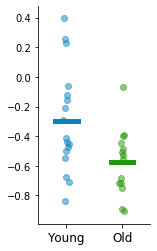

In [19]:
# Plot the comparison of the average delta-d
plot_comp_scatter(mean_diffs)

### Conclusions

In this working memory task, average performance is both load and group dependent. 

This is something we can keep in mind as we analyze if and how spectral parameters predict behaviour, and if they do so differently between groups. 